In [1]:
#lets import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [2]:
#Reading the data from CSV file and intiating to a variable named data
data=pd.read_csv("mushrooms.csv")
data.head() 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#Checking for no of rows and no of columns of the dataset
data.shape

(8124, 23)

In [4]:
#Checking for Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
#Checking the statistics of the dataset
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
#checking for null values
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Two types of classes: e stands for edible and p stands for posionous

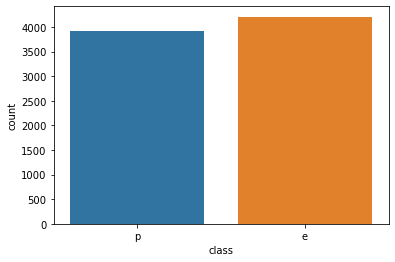

In [8]:
#plotting each class frequency
sns.countplot(x='class',data=data)
plt.show()

<Figure size 1440x1800 with 0 Axes>

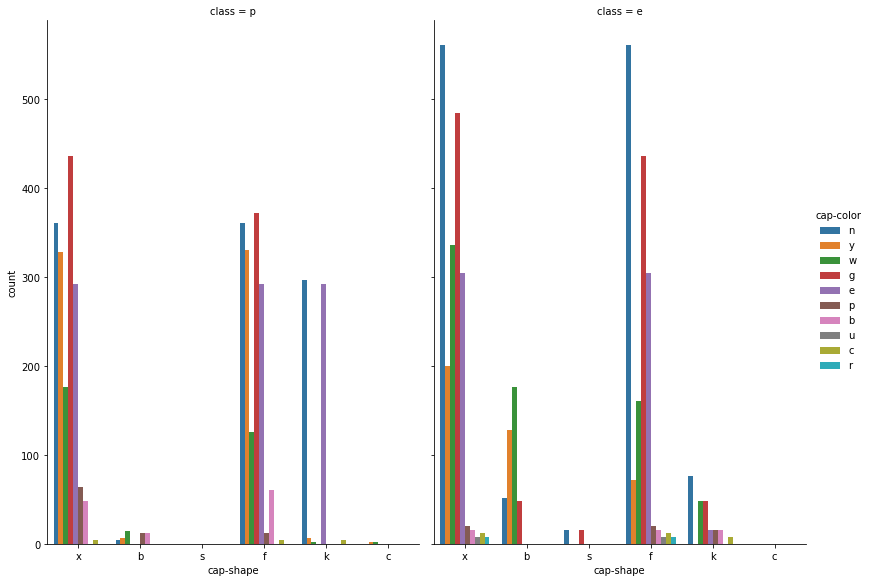

In [9]:
#Plotting the cat plot to find the relation between two or more categorical variables data
plt.figure(figsize=(20,25))
catplot=sns.catplot(x='cap-shape',hue='cap-color',col='class',data=data,kind='count',height=8,aspect=.7)


From the above graph There r 2 types of building like strutures in that left side one is posionous one and the right side one is for edible purpose.So from that we can say that on 'x'shaped has same importance in both it means some of them r posisions and some r edible,in b shaped graph a very less r posionous and a few r edible but we cant say that they r edible or posionous,s shaped those mushrooms r neither posionous or edible,f shaped mushrooms has equal importance they r both posionous and edible,But in k shaped the posionous graph is more it means the k shaped mushrooms r more posionous.hence we cannot use them for eating.

From graph we got to know that:

bell shaped white coloured mushrooms r edible

knobbed shaped red coloured mushrooms r posionous

<Figure size 1440x1800 with 0 Axes>

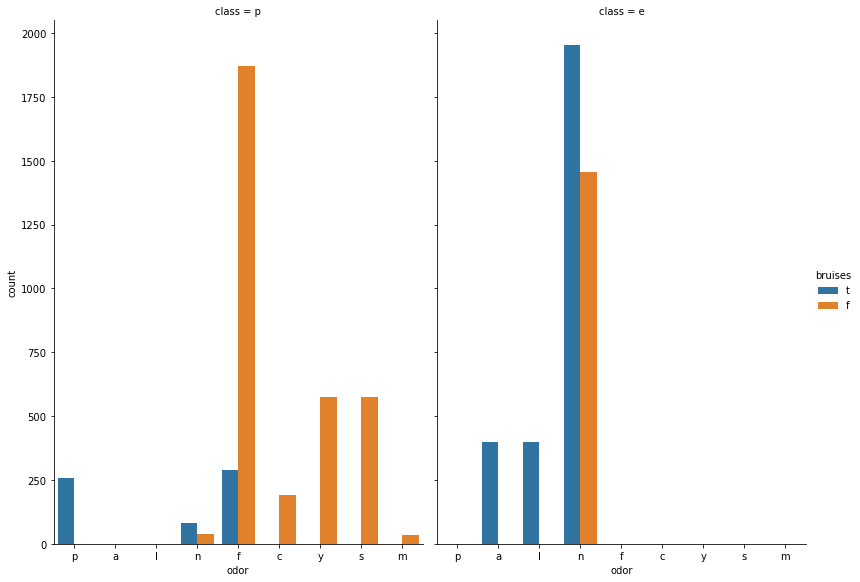

In [10]:
#Plotting the cat plot to find the relation between two or more categorical variables data
plt.figure(figsize=(20,25))
catplot=sns.catplot(x='odor',hue='bruises',col='class',data=data,kind='count',height=8,aspect=.7)

From the above graph we can say that in n odor of edible graph, both mushrooms r bruised and not bruised but in f odor only non bruised mushrooms r more from that we can say that

n=odorless,t=bruises

odorless bruised mushrooms r used for eating(edible)

f=fishy,f=not bruised

fishy odor not bruised mushrooms r posionous

In [11]:
#Since we have categorical data lets use label encoder to change the categorical data to continous data so that our model can undersatnd
from sklearn.preprocessing import LabelEncoder
#Lets Intiate to one of the variable
le=LabelEncoder()
#lets fit the label encoder
data=data.apply(le.fit_transform)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1



from above plot we can know that the data set is not imbalanced.Now, Lets corrleate the classes with features weather the species r used for eating or r they posionous.

In [12]:
x=data.drop(['class'],axis=1)
y=data['class']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

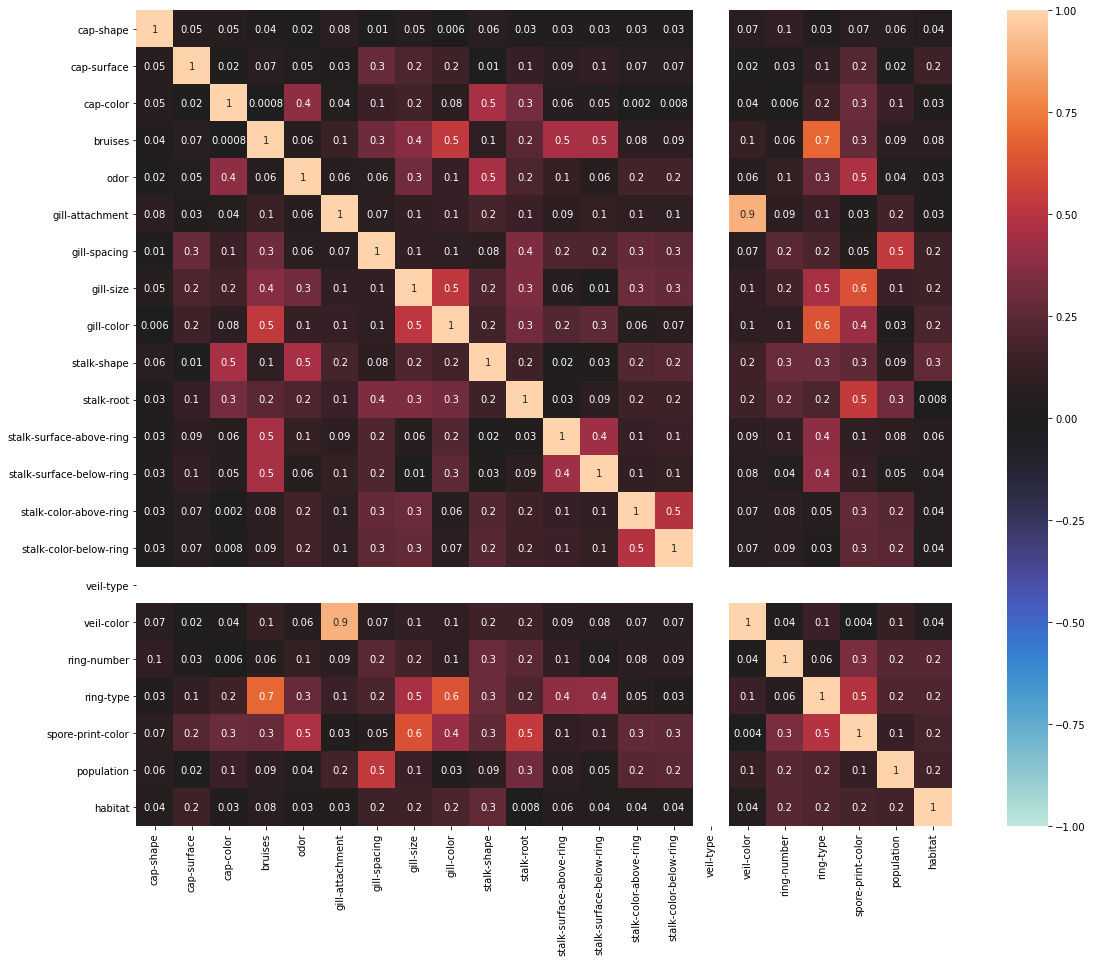

In [13]:
#lets plot heat map and see how the features are corrleated to each other or to check multi collinearity
df_corr=x.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g')
plt.tight_layout

from above heat map we can say that there is no multicollinearity exists which mean there is no relation between one feature to the other feature

In [14]:
#importing the required algorithm techniques used for the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

# LOGISTIC REGRESSION ALGORITHM

In [16]:
#lets split our data into training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=340)
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_train)
#Report table for training data
LR_report=pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))
#checking for training data
print('\n--------------------------Train Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{LR_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_train,y_pred)}\n')


--------------------------Train Result-------------------------
Accuracy Score:95.39%
____________________________________
Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.954503     0.953200  0.953882     0.953851      0.953880
recall        0.957206     0.950257  0.953882     0.953732      0.953882
f1-score      0.955852     0.951727  0.953882     0.953789      0.953878
support    3178.000000  2915.000000  0.953882  6093.000000   6093.000000
_____________________________________
confusion matrix:
[[3042  136]
 [ 145 2770]]



In [17]:
pred=LR.predict(x_test)
#Report table for testing data
LR_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))

print('\n--------------------------Test Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{LR_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_test,pred)}\n')


--------------------------Test Result-------------------------
Accuracy Score:95.62%
____________________________________
Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.952839     0.959677  0.956179     0.956258      0.956210
recall        0.961165     0.951049  0.956179     0.956107      0.956179
f1-score      0.956984     0.955344  0.956179     0.956164      0.956176
support    1030.000000  1001.000000  0.956179  2031.000000   2031.000000
_____________________________________
confusion matrix:
[[990  40]
 [ 49 952]]



# KNN Algorithm

In [18]:
#lets split our data into training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=340)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_train)
#Report table for training data
knn_report=pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

print('\n--------------------------Train Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{knn_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_train,y_pred)}\n')


--------------------------Train Result-------------------------
Accuracy Score:100.00%
____________________________________
Classification Report:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3178.0  2915.0       1.0     6093.0        6093.0
_____________________________________
confusion matrix:
[[3178    0]
 [   0 2915]]



In [19]:
#lets split our data into training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=340)
knn=KNeighborsClassifier()
knn.fit(x_test,y_test)
y_pred=knn.predict(x_test)
#Report table for testing data
knn_report=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

print('\n--------------------------Test Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{knn_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_test,y_pred)}\n')


--------------------------Test Result-------------------------
Accuracy Score:99.90%
____________________________________
Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998062     1.000000  0.999015     0.999031      0.999017
recall        1.000000     0.998002  0.999015     0.999001      0.999015
f1-score      0.999030     0.999000  0.999015     0.999015      0.999015
support    1030.000000  1001.000000  0.999015  2031.000000   2031.000000
_____________________________________
confusion matrix:
[[1030    0]
 [   2  999]]



# Decision Tree Algorithm

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=0)
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_train)
#Report table for training data
DT_report=pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

print('\n--------------------------Train Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{DT_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_train,y_pred)}\n')


--------------------------Train Result-------------------------
Accuracy Score:100.00%
____________________________________
Classification Report:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3147.0  2946.0       1.0     6093.0        6093.0
_____________________________________
confusion matrix:
[[3147    0]
 [   0 2946]]



In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=340)
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)
#Report table for testing data
DT_report=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

print('\n--------------------------Test Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{DT_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_test,y_pred)}\n')


--------------------------Test Result-------------------------
Accuracy Score:100.00%
____________________________________
Classification Report:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1030.0  1001.0       1.0     2031.0        2031.0
_____________________________________
confusion matrix:
[[1030    0]
 [   0 1001]]



# Random Forest Classifier

In [28]:
rfc=RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=10,n_estimators=200)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
#Report table for testing data
rfc_report=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

print('\n--------------------------Test Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{rfc_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_test,y_pred)}\n') 


--------------------------Test Result-------------------------
Accuracy Score:100.00%
____________________________________
Classification Report:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1030.0  1001.0       1.0     2031.0        2031.0
_____________________________________
confusion matrix:
[[1030    0]
 [   0 1001]]



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=340)
clf=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)
#Report table for testing data
DT_report=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

print('\n--------------------------Test Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{DT_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_test,y_pred)}\n')


I feel Hyper Parameter tuning is not required in this dataset because accuracy is high almost near to 100% for all the models.So lets go check for cross val score to find the best model

# Cross Validation Scores

In [23]:
#checking for cross validation score
from sklearn.model_selection import cross_val_score
#printing cross val score for Linear Regression model
scr=cross_val_score(LR,x,y,cv=5)
print('cross validation score:',scr.mean()*100)

cross validation score: 83.89794619173931


In [24]:
#printing cross val score for KNN model
scr=cross_val_score(knn,x,y,cv=5)
print('cross validation score:',scr.mean()*100)

cross validation score: 88.08163698370593


In [25]:
#printing cross val score for Decision Tree model
scr=cross_val_score(DT,x,y,cv=5)
print('cross validation score:',scr.mean()*100)

cross validation score: 92.5630617658204


In [31]:
# Cross val score for random forest 
scr=cross_val_score(rfc,x,y,cv=5)
print('cross validation score:',scr.mean()*100) 

cross validation score: 85.96306934444866


In [36]:
#Checking manually to find the difference of accuracy and cross val scores for the algorithms,on testing data
LR=95.39-83.89794619173931
LR

11.492053808260692

In [37]:
KNN=100.00-88.08163698370593
KNN

11.918363016294066

In [38]:
DT=100.00-92.5630617658204
DT

7.436938234179607

In [39]:
rfc=100.00-85.96306934444866
rfc

14.036930655551345

So by above Cross Val Scores we can conclude that the difference of accuracy and the cross val scroe of Decision Tree is less.So for this dataset using Decsion Tree classifier is the best Algorithm

In [40]:
import joblib
joblib.dump(DT,'mushroomproject.pkl')

['mushroomproject.pkl']